In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**Content**

---


This dataset contains 7 features and a label column.<br>

long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".<br>
forehead_width_cm - This column is in CM's. This is the width of the forehead.<br>
forehead_height_cm - This is the height of the forehead and it's in Cm's.<br>
nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".<br>
nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".<br>
lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".<br>
distance_nose_to_lip_long - <br>
This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".<br>

gender - This is either "Male" or "Female".

In [ ]:
#loading data
df = pd.read_csv('/content/gender_classification_v7.csv')

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.shape

(5001, 8)

In [ ]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
df.duplicated().sum()

1768

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3233, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 227.3+ KB


In [ ]:
x = df.drop(['gender'], axis = 1)
y = df['gender']

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model=Sequential()
model.add(Dense(24, activation="relu", input_dim=7))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=50)

Epoch 1/50
81/81 [==============================] - 3s 16ms/step - loss: 0.6695 - accuracy: 0.5913 - val_loss: 0.5916 - val_accuracy: 0.6136
Epoch 2/50
81/81 [==============================] - 1s 18ms/step - loss: 0.5545 - accuracy: 0.7347 - val_loss: 0.4725 - val_accuracy: 0.8872
Epoch 3/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.8488 - val_loss: 0.3505 - val_accuracy: 0.9274
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 0.3449 - accuracy: 0.8840 - val_loss: 0.2603 - val_accuracy: 0.9366
Epoch 5/50
81/81 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.9064 - val_loss: 0.2155 - val_accuracy: 0.9397
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9122 - val_loss: 0.1757 - val_accuracy: 0.9397
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9215 - val_loss: 0.1623 - val_accuracy: 0.9366
Epoch 8/50
81/81 [

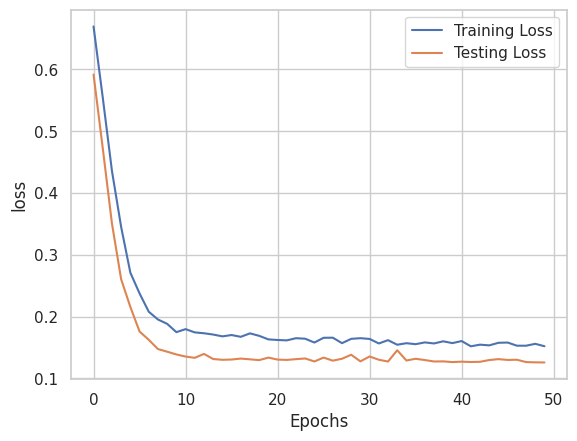

In [ ]:
sns.set(style="whitegrid")
sns.lineplot(history.history['loss'], label='Training Loss')
sns.lineplot(history.history['val_loss'], label='Testing Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=0)
print('Testing Loss: %.2f' % loss_test)
print('Testing Accuracy: %.2f' % (accuracy_test * 100) + '%')
print("*" * 30)
print('Training Loss: %.2f' % loss_train)
print('Training Accuracy: %.2f' % (accuracy_train * 100) + '%')

Testing Loss: 0.13
Testing Accuracy: 92.74%
******************************
Training Loss: 0.14
Training Accuracy: 93.12%
